In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


In [220]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [175]:
df.tail(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
595,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y


In [176]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [177]:
df.replace({'Dependents':{'3+':3}},inplace=True)

In [178]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [179]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [180]:
df.shape

(614, 13)

In [181]:
print(df['Gender'].mode())

0    Male
dtype: object


In [182]:
print(df['Gender'].mode()[0])

Male


In [183]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [184]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [185]:
print(df['Married'].mode())

0    Yes
dtype: object


In [186]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [187]:
print(df['Dependents'].mode())

0    0
dtype: object


In [188]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [189]:
print(df['Self_Employed'].mode())

0    No
dtype: object


In [190]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [191]:
print(df['LoanAmount'].mean())

146.41216216216216


In [192]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [193]:
df['Loan_Amount_Term'].value_counts() 

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [194]:
df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [195]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [196]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [197]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [198]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [199]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [200]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [201]:
label_encoder = preprocessing.LabelEncoder()
df['Education']= label_encoder.fit_transform(df['Education'])
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Married']= label_encoder.fit_transform(df['Married'])
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area']= label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status'])

In [202]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

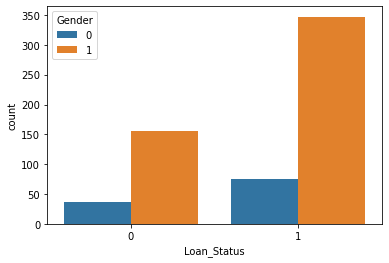

In [203]:
sns.countplot(x="Loan_Status",hue="Gender",data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

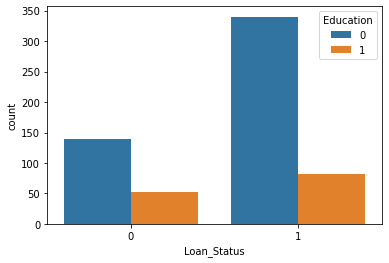

In [204]:
sns.countplot(x="Loan_Status",hue="Education",data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

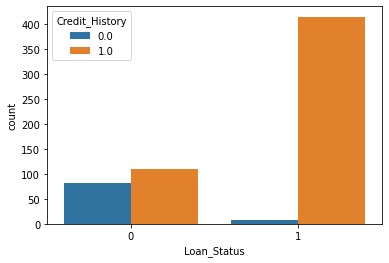

In [205]:
sns.countplot(x="Loan_Status",hue="Credit_History",data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

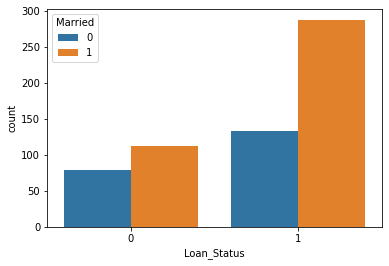

In [206]:
sns.countplot(x="Loan_Status",hue="Married",data=df)

In [207]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [208]:
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

In [209]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          0              0             5849   
1         1        1          1          0              0             4583   
2         1        1          0          0              1             3000   
3         1        1          0          1              0             2583   
4         1        0          0          0              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          0              0             2900   
610       1        1          3          0              0             4106   
611       1        1          1          0              0             8072   
612       1        1          2          0              0             7583   
613       0        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [210]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [211]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


In [212]:
classifier = svm.SVC(kernel='linear')

In [221]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [215]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [216]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8061594202898551


In [217]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [218]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8064516129032258
